<h1 style="font-size: 30px; text-align: center">Algorithmes sur les AB et les ABR - Exercices</h1>

# Exercice 1 : Parcours en largeur d'un AB

Dans le cas où un arbre est parcouru niveau par niveau (en commençant par la racine est en lisant de gauche à droite) on parle d'un **parcours en largeur d'abord**. On utilise le terme *largeur* car dans ce cas on explore les noeuds en balayant en largeur chaque niveau de l'arbre de la gauche vers la droite.

**Question 1** : Indiquez dans quel ordre les noeuds sont explorés dans le cas d'un parcours en largeur de l'arbre `A1` suivant.

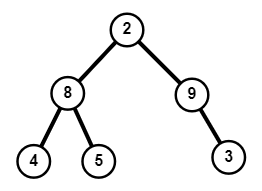


*Réponse* : 2 - 8 - 9 - 4 - 5 - 3

**Principe de l'algorithme** :

L'algorithme de parcours en largeur d'un AB nécessite l'utilisation d'un *file* d'attente. Voici son principe :

- On place l'arbre dans la file
- Tant que la file n'est pas vide :
    - On défile son premier élément
    - Si l'arbre défilé n'est pas vide, on affiche son etiquette et ajoute ses deux sous-arbres dans la file
    - (Sinon, on ne fait rien : on passe donc directement à l'itération suivante)
    
>Il s'agit donc d'une file d'arbres binaires !

On utilisera les classes `Files` et `Noeud` rappelées ci-dessous pour implémenter les files et les arbres binaires. L'arbre binaire vide est représentée par la valeur `None`.

In [30]:
class File:
    """Pour manipuler des files"""
    def __init__(self):
        self.contenu = []
        
    def enfiler(self, element):
        self.contenu.append(element)
        
    def defiler(self):
        self.contenu.pop(0)
    
    def premier(self):
        return self.contenu[0]
    
    def taille(self):
        return len(self.contenu)
    
    def __repr__(self):
        ch = ""
        for e in self.contenu:
            ch = ch + str(e) + ","
        ch = ch[:-1] # pour enlever la dernière virgule
        ch = "<" + ch + "<"
        return ch
    
class Noeud:
    """Pour manipuler des arbres binaires"""
    def __init__(self, e, g=None, d=None):
        self.etiquette = e
        self.gauche = g
        self.droit = d

    def est_feuille(self):
        return not self.gauche and not self.droit
    
    # Une représentation possible de l'arbre
    def __repr__(self):
        ch = str(self.etiquette)
        if self.gauche or self.droit:
            ch = ch + '-(' + str(self.gauche) + ',' + str(self.droit) + ')'
        return ch

**Question 2** : Utilisez la classe `Noeud` pour représenter l'arbre `A1` de la question 1.

In [31]:
# à vous de jouer !
A1 = Noeud(2, Noeud(8, Noeud(4), Noeud(5)), Noeud(9, None, Noeud(3)))
A1

2-(8-(4,5),9-(None,3))

**Question 3** : Ecrivez une fonction `parcours_largeur(A)` qui implémente l'algorithme de parcours en largeur d'un arbre binaire `A`. Testez-la sur l'arbre `A1` et vérifiez que l'ordre des sommets parcourus est le bon.

In [41]:
def parcours_largeur(A):
    file = File()
    file.enfiler(A)
    while file.taille() > 0:
        n = file.defiler()
        print(n.etiquette, end=" ")
        if n.gauche:
            file.enfiler(n.gauche)
        if n.droit:
            file.enfiler(n.droit)

parcours_largeur(A1)

Traceback (most recent call last):
  File "<input>", line 12, in <module>
  File "<input>", line 6, in parcours_largeur
AttributeError: 'NoneType' object has no attribute 'etiquette'


Error: 

# à vous de jouer !


**Question 4** : Modifiez la classe `File` pour la méthode `defiler` renvoie aussi le premier élément. Vous supprimerez la méthode `premier` qui devient inutile.

In [27]:
# à vous de jouer !

class File:
    """Pour manipuler des files"""
    def __init__(self):
        self.contenu = []
    
    def enfiler(self, element):
        self.contenu.append(element)
    
    def defiler(self):
        if self.contenu:
            return self.contenu.pop(0)
        else:
            return None
    
    def taille(self):
        return len(self.contenu)
    
    def __repr__(self):
        ch = ""
        for e in self.contenu:
            ch = ch + str(e) + ","
        ch = ch[:-1]  # pour enlever la dernière virgule
        ch = "<" + ch + "<"
        return ch

**Question 5** : Récrivez la fonction `parcours_en_largeur(A)` pour tenir compte de la modification de la classe `File`.

In [29]:
# à vous de jouer !

def parcours_en_largeur(A):
    if A is None:
        return []
    
    queue = File()
    queue.enfiler(A)
    visited = set()
    result = []
    
    while queue.taille() > 0:
        node = queue.defiler()
        if node not in visited:
            visited.add(node)
            result.append(node.etiquette)
            if node.gauche:
                queue.enfiler(node.gauche)
            if node.droit:
                queue.enfiler(node.droit)
    
    return result

print(parcours_en_largeur(A1))  # Output: [2, 8, 9, 4, 5, 3]

[2, 8, 9, 4, 5, 3]


# Exercice 2 : Parcours en profondeur d'un AB

On suppose que l'on dispose des opérations suivantes sur un AB :

- `estVide(A)` : renvoie Vrai si et seulement si l'arbre binaire `A` ne contient aucun noeud.
- `etiquette(A)` : renvoie l'étiquette de l'arbre binaire `A` (*précondition* : `A` est non vide).
- `gauche(A)` : renvoie le sous-arbre gauche de l'arbre binaire `A` (*précondition* : `A` est non vide).
- `droit(A)` : renvoie le sous-arbre droit de l'arbre binaire `A` (*précondition* : `A` est non vide).

## Ordre préfixe

On considère l'algorithme suivant qui a pour but d'afficher toutes les étiquettes des noeuds d'un arbre binaire `A`.

<pre><code><u>fonction</u> parcours_prefixe(ArbreBinaire A)
    <u>si</u> non estVide(A) <u>alors</u>
        afficher à l'écran etiquette(A)
        parcours_prefixe(gauche(A))
        parcours_prefixe(droit(A))
    <u>fin si</u>
</code></pre>

**Question 1** : Déroulez l'exécution de `parcours_prefixe(A1)` où `A1` est l'arbre binaire suivant. Vous indiquerez les étiquettes affichées dans l'ordre défini par l'algorithme.

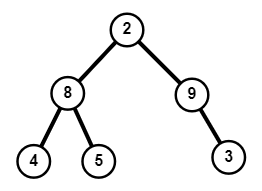

>Ce parcours d'arbre traite l'étiquette du noeud courant puis traite son sous-arbre gauche puis son sous-arbre droit : cet ordre de traitement des noeuds s'appelle **ordre préfixe**. 

On dispose l'implémentation suivante d'un AB avec des tableaux. L'arbre vide est représenté par un tableau vide.

In [8]:
def noeud(etiquette, arbre_gauche=[], arbre_droit=[]):
    """Crée et renvoie l'arbre binaire"""
    return [etiquette, arbre_gauche, arbre_droit]

def etiquette(arbre):
    """Renvoie l'étiquette de l'arbre binaire arbre"""
    return arbre[0]

def gauche(arbre):
    """Renvoie le sous-arbre gauche de l'arbre binaire arbre"""
    return arbre[1]

def droit(arbre):
    """Renvoie le sous-arbre droit de l'arbre binaire arbre"""
    return arbre[2]

def est_feuille(arbre):
    """Renvoie True si et seulement si l'arbre binaire arbre est une feuille """
    return arbre[1] == [] and arbre[2] == []

On peut alors créer l'arbre binaire `A1` précédent comme suit.

In [42]:
A1 = noeud(2, noeud(8, noeud(4), noeud(5)), noeud(9, [], noeud(3)))

**Question 2** : Implémentez en Python la fonction `parcours_prefixe(A)` et vérifiez qu'en l'appliquant sur l'arbre binaire `A1` vous retrouvez bien l'ordre des sommets de la question 1.

# à vous de jouer !


## Ordre infixe

Dans le cas d'un parcours des noeuds suivant un **ordre infixe**, le noeud au courant est traité entre son sous-arbre gauche et son sous-arbre droit.

**Question 3** : Indiquez l'ordre des noeuds visités si on parcours l'arbre `A1` selon un ordre infixe.

*Réponse* :

**Question 4** : Ecrivez une fonction `parcours_infixe(A)` qui affiche les étiquettes des noeuds de l'arbre binaire `A` visité selon l'ordre infixe. 

# à vous de jouer !


## Ordre suffixe

Dans le cas d'un parcours des noeuds suivant un **ordre suffixe**, le noeud au courant est traité après son sous-arbre gauche et son sous-arbre droit.

**Question 5** : Indiquez l'ordre des noeuds visités si on parcours l'arbre `A1` selon un ordre suffixe.

*Réponse* : 

**Question 6** : Ecrivez une fonction `parcours_suffixe(A)` qui affiche les étiquettes des noeuds de l'arbre binaire `A` visité selon l'ordre infixe. 

# à vous de jouer !


# Exercice 3 : Retour sur les ordres de parcours en profondeur

Voici un arbre binaire `A2`. Donnez l'ordre des sommets visités lors d'un parcours :
- en largeur d'abord
- par ordre préfixe
- par ordre infixe
- par ordre suffixe

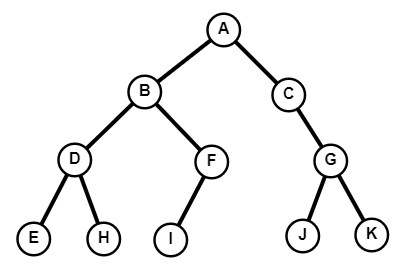


# Exercice 4 : Ordres préfixe, infixe, suffixe avec une version objet d'un AB

On suppose que l'on dispose de la classe `Noeud` pour implémenter les arbres binaires.

In [43]:
class Noeud:
    """Pour manipuler des arbres binaires"""
    def __init__(self, e, g=None, d=None):
        self.etiquette = e
        self.gauche = g
        self.droit = d

    def est_feuille(self):
        return not self.gauche and not self.droit
    
    # Une représentation possible de l'arbre
    def __repr__(self):
        ch = str(self.etiquette)
        if self.gauche or self.droit:
            ch = ch + '-(' + str(self.gauche) + ',' + str(self.droit) + ')'
        return ch

**Question 1** : On donne ci-dessous la façon de construire l'arbre `A1` de l'exercice 2 avec le constructeur de cette classe. Construisez l'arbre `A2` de l'exercice 3 qui est rappelé ci-dessous.

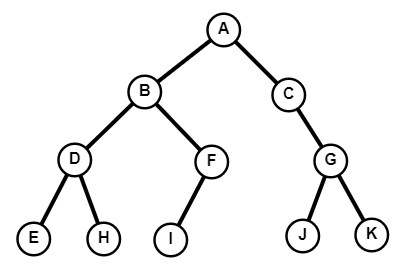


In [45]:
A1 = Noeud(2, Noeud(8, Noeud(4), Noeud(5)), Noeud(9, None, Noeud(3)))
# mémorisation de l'arbre A2 : à vous de jouer !


**Question 2** : Réécrivez les fonctions `parcours_prefixe(A)`, `parcours_infixe(A)` et `parcours_suffixe(A)` en tenant compte de la représentation objet des arbres binaires avec la classe `Noeud`.

# à vous de jouer !


**Question 3** : Testez les 3 fonctions sur les arbres binaires `A1` et `A2`.

# à vous de jouer !


# Exercice 5 : Recherche dans un AB

On veut écrire une fonction récursive `etq_presente(A, e)` qui renvoie Vrai si l'étiquette `e` est présente dans l'AB `A`; et Faux sinon.

**Question 1** : Recopiez et complétez la phrase suivante présentant le principe de l'algorithme de la recherche :

```
Si l'arbre est ... alors on renvoie ..., sinon on regarde si l'étiquette est ... ou ... ou .... 
```

*Réponse* :

**Question 2** : Ecrivez la fonction récursive `etq_presente(A, e)`. *On suppose que les AB sont implémentés avec la classe `Noeud` (voir exercice précédent)*.

# à vous de jouer !


**Question 3** : Proposez un bon jeu de test à l'aide des arbres `A1` et `A2` des exercices précédents et vérifiez que votre fonction passe tous les tests avec succès.

# à vous de jouer !


**Question 4** : Quel est le coût en temps de cet algorithme (dans le pire cas) ?

*Réponse* :

# Exercice 6 : Arbres binaires de recherches (ABR)

>**Définition** : Un **arbre binaire de recherche**, abrégé ABR, est un arbre binaire dans lequel *tout* noeud a une étiquette :
>- plus grande ou égale à celles de son sous-arbre gauche
>- plus petite strictement que celles de son sous-arbre droit


**Question 1** : Les deux arbres suivants sont-ils des ABR ? Expliquez.

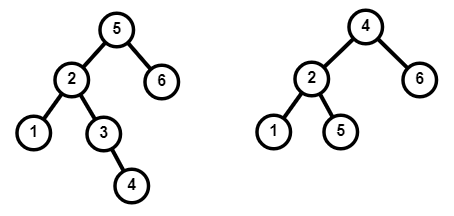

**Question 2** : Donnez tous les ABR formés de trois noeuds contenant les entiers 1, 2 et 3.

**Question 3** : Construisez 3 arbres binaires de forme quelconque à 10 noeuds. Rangez-y les entiers de 1 à 10 à la façon d'un ABR. Que constatez-vous ?

**Question 4** : Dans un ABR, où trouve-t-on la valeur minimale ? la valeur maximale ?

# Exercice 7 : Recherche dans un ABR

## Questions préléminaires

Voici un AB :

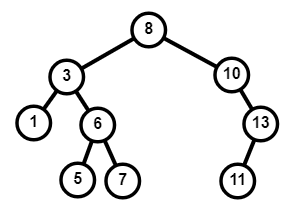


**Question 1** : Expliquez pourquoi il s'agit d'un ABR.

**Question 2** : On veut chercher l'étiquette "6". Expliquez comment procéder en partant de la racine.

**Question 3** : Même question pour chercher l'étiquette "7".

**Question 4** : Même question pour chercher l'étiquette "12".

## Algorithme de recherche dans un ABR

On veut écrire une fonction *récursive* `etq_presente(A, e)` qui renvoie Vrai si l'étiquette `e` est présente dans l'ABR `A`, et Faux sinon.

**Question 5** : Recopiez et complétez l'algorithme de cette fonction.

<pre><code><u>fonction</u> etq_presente(A, e) → Booléen
    <u>si</u> est_vide(A) <u>alors</u>
        ...
    <u>sinon</u>
        <u>si</u> ... <u>alors</u>
            ...
        <u>sinon</u>
            <u>si</u> ... <u>alors</u>
                ...
            <u>sinon</u>
                ...
            <u>fin si</u>
        <u>fin si</u>
    <u>fin si</u>   
</code></pre>

**Question 6** : Implémentez cette fonction en Python. *Vous utiliserez une représentation objet des AB*.

# à vous de jouer !


**Question 7** : Testez la fonction en utilisant l'ABR `A3` donné en-dessous.

![un ABR](data/abr_ex7.png)

A3 = Noeud(8, Noeud(3, Noeud(1), Noeud(6, Noeud(5), Noeud(7))), Noeud(10, None, Noeud(13, Noeud(11), None)))
#print(A3)
# à vous de jouer !


# Exercice 8 : Caractérisitiques d'un ABR

Dans cet exercice on considère l'ABR suivant :

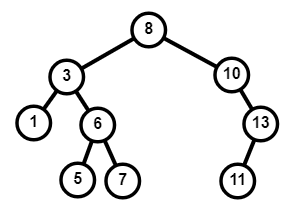

## Ordre de parcours

**Question 1** : Donnez l'ordre des sommets visités selon les parcours par ordre préfixe, infixe et suffixe.

**Question 2** : Que remarquez-vous ?

# Recherche du minimum

**Question 3** : Rappelez comment trouver l'étiquette minimale d'un ABR.

*Réponse* :

**Question 4** : Ecrivez une fonction *itérative* `etq_min(A)` qui renvoie l'étiquette minimale d'un ABR `A` non vide.

# à vous de jouer !


**Question 5** : Ecrivez une fonction *récursive* `etq_min_rec(A)` qui renvoie l'étiquette minimale d'un ABR `A` supposée non vide.

# à vous de jouer !


## Recherche du maximum

**Question 6** : Proposez une fonction *itérative* `etq_max(A)` et une fonction *récursive* `etq_max_rec(A)` qui renvoient l'étiquette maximale d'un ABR `A` supposé non vide. 

# à vous de jouer !


# Exercice 9 : Insérer une clé dans un ABR

Ce dernier exercice traite l'insertion d'une clé dans un ABR, un algorithme au programme. Dans un premier temps, vous écrirez un algorithme qui fait l'insertion avec modification en place de l'ABR, et dans un second temps vous écrirez une version plus simple mais qui renvoie un nouvel arbre à chaque insertion (et ne modifie donc pas les arbres passés en argument).

## Version avec *modification en place*

Voici un AB :

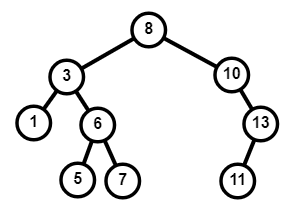


**Question 1** : On veut insérer l'étiquette "4" dans cet ABR. Expliquez comment procéder en partant de la racine.

**Question 2** : Même question pour chercher l'étiquette "2".

**Question 3** : Même question pour chercher l'étiquette "9".

**Question 4** : Recopiez et complétez le principe de l'algorithme récursif suivant qui ajoute la clé `e` dans l'ABR non vide `A`.

<pre><code><u>fonction</u> ajouter(A, e)
    <u>si</u> e <= etiquette(A) <u>alors</u>
        <u>si</u> est_vide(gauche(A)) <u>alors</u>
            ...
        <u>sinon</u>
            ajouter(...)
        <u>fin si</u>
    <u>sinon</u> 
        ...
</code></pre>

**Question 5** : Implémentez cette fonction en Python. *Vous utiliserez la représentation d'un ABR par la classe `Noeud`*.

# à vous de jouer !


**Question 6** : On a représenté l'arbre `A3` de cet exercice ci-dessous. Ecrivez les instructions permettant d'insérer les clés 4, 2 puis 9. Vérifiez ensuite que les clés ont bien été insérées aux bons endroits.

A3 = Noeud(8, Noeud(3, Noeud(1), Noeud(6, Noeud(5), Noeud(7))), Noeud(10, None, Noeud(13, Noeud(11), None)))
# à vous de jouer !


**Question 7** : Créez un ABR à un noeud. Ecrivez ensuite les instructions permettant d'y insérer 4 clés en affichant l'arbre modifié à chaque insertion pour vérifier.

# à vous de jouer !


>**Remarque** : L'algorithme d'insertion ainsi écrit doit se faire dans un ABR **non vide**. En effet, le cas de l'insertion dans un arbre vide (représenté par `None`) n'est pas pris en compte. On pourrait le faire mais cela compliquerait les choses. En revanche, si on écrit un algorithme qui ne modifie pas en place l'arbre passé en argument on peut écrire un algorithme d'insertion plus court et qui englobe le cas de l'insertion dans un arbre vide. 

## Version avec *construction de nouveaux arbres*

Pour terminer, on va écrire une fonction `ajouter(A, e)` qui renvoie un *nouvel* arbre contenant `e` et tous les noeuds de l'arbre `A`. On va encore procéder récursivement.

**Question 8** : Le cas de base concerne l'ajout dans un arbre vide. Que doit renvoyer la fonction dans ce cas ?

**Question 9** : Si l'abre `A` n'est pas vide, il faut comparer `e` à l'étiquette de `A`. Selon le cas, il faut ajouter `e` au sous-arbre gauche ou au sous-arbre droit de `A`. Complétez avec des phrases ce que la fonction doit faire selon les cas :

<pre><code><u>si</u> e <= etiquette(A) <u>alors</u>
    <u>renvoyer</u> Noeud(...................., ...................., ....................)
<u>sinon</u>
    <u>renvoyer</u> Noeud(...................., ...................., ....................)
</code></pre>

**Question 10** : Ecrivez cette fonction récursive en Python. *N'oubliez pas le cas de base*.

# à vous de jouer !


**Question 11** : On a représenté l'arbre `A3` de cet exercice ci-dessous. Ecrivez les instructions permettant d'insérer les clés 4, 2 puis 9. **Attention** : la fonction renvoie un nouvel arbre. Vérifiez ensuite que les clés ont bien été insérées aux bons endroits.

A3 = Noeud(8, Noeud(3, Noeud(1), Noeud(6, Noeud(5), Noeud(7))), Noeud(10, None, Noeud(13, Noeud(11), None)))
# à vous de jouer !


**Question 12** : Ecrivez ensuite les instructions permettant de construire le même ABR que dans la question 7 en procédant par insertion successives.

# à vous de jouer !


---

**Références :**
- Equipe pédagogique DIU EIL, Université de Nantes.
- Livre *Spécialité Numérique et sciences informatiques : 24 leçons avec exercices corrigés - Terminale*, éditions Ellipses, T. Balabonski, S. Conchon, J.-C. Filliâtre, K. Nguyen pour la question 2 de l'exercice 6 et la deuxième partie de l'exercice 9 (ajout dans un ABR sans modification des arbres passés en paramètres). Site du livre : [http://www.nsi-terminale.fr/](http://www.nsi-terminale.fr/).

---
Germain BECKER, Lycée Mounier, ANGERS 

![Licence Creative Commons](https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png)